In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'C:/Users/s_csmscox/jupyterSave/dvc/train'
validation_dir = 'C:/Users/s_csmscox/jupyterSave/dvc/valid'

batch_size = 20

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,  # 지정된 각도 범위내에서 임의로 원본 이미지를 회전
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1,    #  1-수치 혹은 1+수치만큼 확대 및 축소
                                   horizontal_flip=True,
                                   vertical_flip=True)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['0', '1'],
    target_size=(128,128),                      
    batch_size=batch_size,     
    class_mode='categorical'                    
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['0', '1'],
    target_size=(128,128),                       
    batch_size=batch_size,    
    class_mode='categorical'                    
)


Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.applications import VGG16

np.random.seed(42)

# 모델 구축

# vgg16 모델 불러오기
pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
pre_trained_vgg.trainable = False
pre_trained_vgg.summary()

# vgg16 모델에 덧붙이기
model = Sequential()
model.add(pre_trained_vgg)
model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(2048, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1024, activation='relu', kernel_initializer='he_normal'))

model.add(Dense(2, activation='softmax'))

model.summary()

model.compile(optimizer=Adam(learning_rate=1e-7), loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
#모델 학습
early_stopping = EarlyStopping(patience = 5) # 조기종료 콜백함수 정의

# 데이터 개수 / batch_size
steps_per_epoch = 15000 / batch_size
val_steps = 5000 / batch_size

histroy = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=val_steps,
                    callbacks=[early_stopping],
                    verbose=1
                    )

Epoch 1/100
750/750 [==============================] - 156s 208ms/step - loss: 0.6806 - accuracy: 0.5796 - val_loss: 0.6173 - val_accuracy: 0.6676
Epoch 2/100
750/750 [==============================] - 149s 199ms/step - loss: 0.6006 - accuracy: 0.6867 - val_loss: 0.5378 - val_accuracy: 0.7652
Epoch 3/100
750/750 [==============================] - 149s 199ms/step - loss: 0.5498 - accuracy: 0.7420 - val_loss: 0.4848 - val_accuracy: 0.8038
Epoch 4/100
750/750 [==============================] - 149s 198ms/step - loss: 0.5148 - accuracy: 0.7707 - val_loss: 0.4450 - val_accuracy: 0.8232
Epoch 5/100
750/750 [==============================] - 151s 202ms/step - loss: 0.4865 - accuracy: 0.7865 - val_loss: 0.4141 - val_accuracy: 0.8408
Epoch 6/100
750/750 [==============================] - 150s 200ms/step - loss: 0.4590 - accuracy: 0.8033 - val_loss: 0.3893 - val_accuracy: 0.8504
Epoch 7/100
750/750 [==============================] - 147s 196ms/step - loss: 0.4408 - accuracy: 0.8126 - val_loss: 0

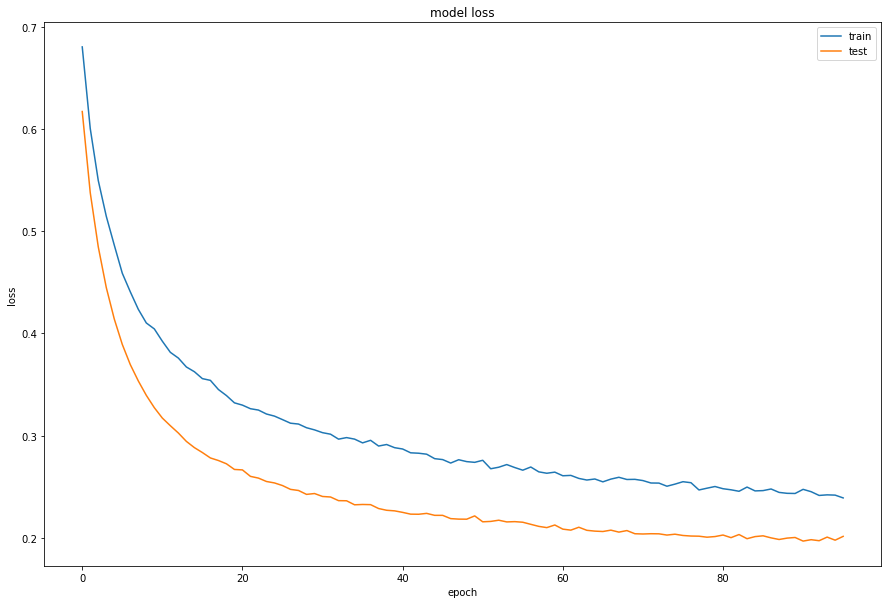

train loss= 0.23896603286266327
validation loss= 0.20132386684417725


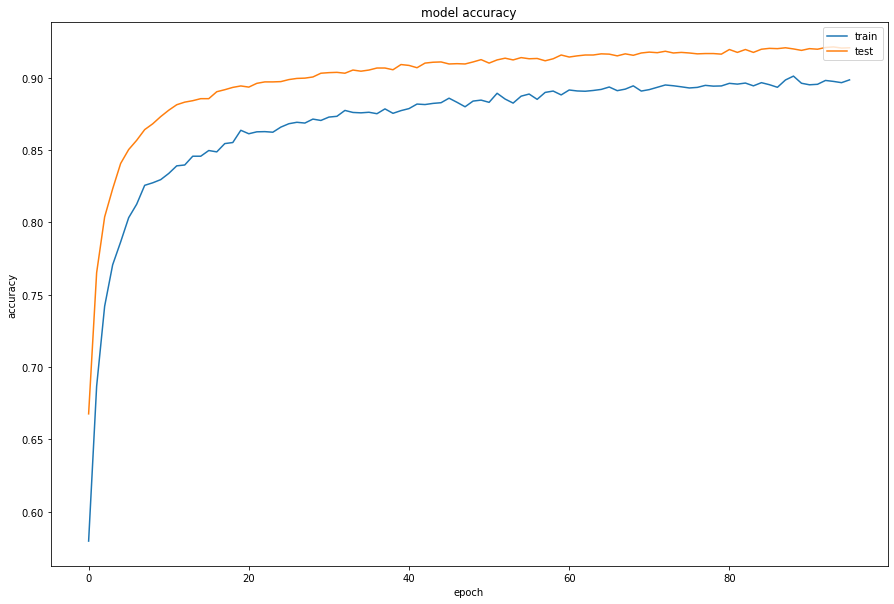

train accuracy= 0.8985999822616577
validation accuracy= 0.920799970626831


In [5]:
# 학습 곡선을 나타내는 함수
def plot_loss_curve(history):
    plt.figure(figsize=(15, 10))

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()   
    
    print("train loss=", history.history['loss'][-1])
    print("validation loss=", history.history['val_loss'][-1])
    
def plot_acc_curve(history):
    plt.figure(figsize=(15, 10))

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()   
    
    print("train accuracy=", history.history['accuracy'][-1])
    print("validation accuracy=", history.history['val_accuracy'][-1])
    
plot_loss_curve(histroy)
plot_acc_curve(histroy)